In [1]:
from Scripts import loading as dl, profiling as pf, preprocessing as prep
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [3]:
amazon_link = '../Data/schema_phone.pkl'
df = dl.load_sampled_amazon(amazon_link, 10000)

In [4]:
df[df['text'] == '']

,text,label


In [5]:
df[df.label.isnull()]

,text,label


In [6]:
pf.create_word_count(df)

,text,label,word_count
0,"""Gave it to granddaughter at Xmas - no info, n...",1.0,83
1,"""I purchased an iPhone for my wife for cheap, ...",1.0,45
2,"""The black earcuff material separates at the e...",1.0,36
3,"""Apple iPhone SE Review; Why it might be the B...",1.0,50
4,The Good: Rugged phone. Easy to use. Big red s...,1.0,617
...,...,...,...
49995,"I love my phone cover, I always get asked abou...",5.0,56
49996,"""\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\...",5.0,79
49997,"""Good quality, good looking, very protective. ...",5.0,47
49998,"Bought for my new iPhone XS, really pretty cov...",5.0,29


In [7]:
pf.get_longest_review(df)

The longest review text in our sample has 16108 words.
Longest review text:

30761    "\n             \n\n\n{\n    \"@context\":\"ht...
32180    "\n             \n\n\n{\n    \"@context\":\"ht...
Name: text, dtype: object 30761    4.0
32180    4.0
Name: label, dtype: float64


In [8]:
pf.get_shortest_review(df)

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 91 times.
10135                                         "Exercising"
10262                                         "Exercising"
10795                                         "Exercising"
10966                                         "Exercising"
12215                                         "Exercising"
                               ...                        
47644                       "Http://jobandcash.com/?share"
47947                             "thisisformyallfriendes"
47992                                   "i+love+this+tone"
48331                                "very.nice.song.."@vi
49670    "phoneky.com/mp3-ringtones/?pview-item&amp;idm...
Name: text, Length: 91, dtype: object 10135    2.0
10262    2.0
10795    2.0
10966    2.0
12215    2.0
        ... 
47644    5.0
47947    5.0
47992    5.0
48331    5.0
49670    5.0
Name: label, Length: 91, dtype: float64


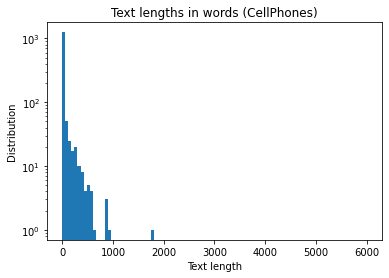

In [9]:
pf.get_word_length_dist(df, 'CellPhones', True)

In [10]:
# PREPROCESSING
df.text = prep.preprocess_reviews(df.text)

In [11]:
df.iloc[100].text

'bbc report tech monster appl explain challeng court request offer fbi agent assist access inform telephon place one san bernardino shooter organ coordin bolster fbi outmaneuv secur program farook iphon en us'

In [ ]:
# classifier = LogReg, LinearSVC,
# Feature selection: selectkbest (f_regression, mutual_info_regression, f_classif,

Feature size of TF-IDF:  1024513
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.718
Precision:0.7221553626933532
F1:0.7138588161900353
col_0   1.0   2.0   3.0   4.0   5.0
label                              
1.0    2145   177     0    83    95
2.0      52  2272    30    70    76
3.0      39   319  1583   361   198
4.0      69   215   361  1247   608
5.0      60   362    66   284  1728


c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


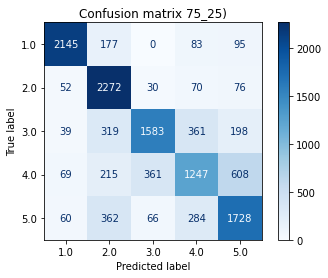

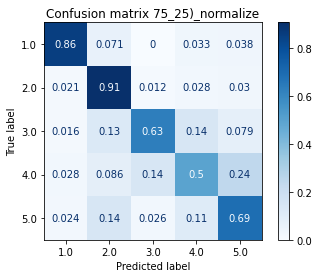

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=7, stratify=df.label)

# vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()

print ("Feature size of TF-IDF: ", len(vocab))
test_vectorized = vectorizer.transform(X_test)

In [ ]:
# vectorizer_chi2 = SelectKBest(chi2,k=3000)
vectorizer_fs = SelectKBest(score_func=f_regression, k=2500)

fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

# Train the model using the training sets
# nb.fit(X_train, y_train)

clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')

clf.fit(fs_train_vectorized, y_train)
#Predict the response for test dataset
y_pred = clf.predict(fs_test_vectorized)
print("Training and prediction done")
print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

# Model Accuracy, how often is the classifier correct?
print("train: 75, text: 25")
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("F1:" + f1)
print(pd.crosstab(y_test, y_pred))

# Visualization of Confusion Matrix and saving
plt.rcParams['figure.facecolor'] = 'white'
title = f"Confusion matrix 75_25)"
disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                             display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.show()

title_norm = title + "_normalize"
disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                             display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp_norm.ax_.set_title(title_norm)
plt.show()


